<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Relax-Data-Science-Challenge-(Take-home-challenge)" data-toc-modified-id="Relax-Data-Science-Challenge-(Take-home-challenge)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Relax Data Science Challenge (Take home challenge)</a></span></li><li><span><a href="#Overview" data-toc-modified-id="Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Objective" data-toc-modified-id="Objective-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Wrangling</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Preprocessing-the-Data" data-toc-modified-id="Preprocessing-the-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Preprocessing the Data</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Relax Data Science Challenge (Take home challenge)

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# pip install imblearn

# Overview

The  data  is  available  as  two  attached  CSV  files:
takehome_user_engagement. csv
takehome_users . csv

The  data  has  the  following  two  tables:
1]  A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the
product  in  the  last  two  years.   This  table  includes:

● name:  the  user's  name

● object_id:   the  user's  id

● email:  email  address

● creation_source:   how  their  account  was  created.  This  takes  on  one
of  5  values:

○ PERSONAL_PROJECTS:  invited  to  join  another  user's
personal  workspace

○ GUEST_INVITE:  invited  to  an  organization  as  a  guest
(limited  permissions)

○ ORG_INVITE:  invited  to  an  organization  (as  a  full  member)

○ SIGNUP:  signed  up  via  the  website

○ SIGNUP_GOOGLE_AUTH:  signed  up  using  Google
Authentication  (using  a  Google  email  account  for  their  login
id)

● creation_time:  when  they  created  their  account

● last_session_creation_time:   unix  timestamp  of  last  login

● opted_in_to_mailing_list:  whether  they  have  opted  into  receiving
marketing  emails

● enabled_for_marketing_drip:  whether  they  are  on  the  regular
marketing  email  drip

● org_id:   the  organization  (group  of  users)  they  belong  to

● invited_by_user_id:   which  user  invited  them  to  join  (if  applicable).

2]  A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day
that  a  user  logged  into  the  product.
Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption .

We  suggest  spending  1­2  hours  on  this,  but  you're  welcome  to  spend  more  or  less.
Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more
than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help
us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation
you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data
you  think  would  be  valuable

# Objective

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period , identify which factors predict future user adoption 

# Data Wrangling

In [89]:
#Read data
# becuase error reading UnicodeDecodeError:
# 'utf-8' codec can't decode byte 0xe6 in position 11: invalid continuation byte
#  pd.read_csv("takehome_users.csv", encoding='latin-1')
thu_engagement = pd.read_csv("takehome_user_engagement.csv", parse_dates=True)
thu = pd.read_csv("takehome_users.csv", encoding='latin-1')

First I will work the first list which is the takehome _user _engagement

In [90]:
thu_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [91]:
thu_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [92]:
# time stamp doesn't have the correct data type
thu_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [93]:
# converting to datetime
thu_engagement.time_stamp = pd.to_datetime(thu_engagement.time_stamp)

In [94]:
thu_engagement.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

__Defining the adopted User__

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period , identify which factors predict future user adoption .

In [95]:
# setting the index for user_id and time stamp and sorting by them
thu_engagement = thu_engagement.set_index(['user_id', 'time_stamp']).sort_index()
thu_engagement.head()

visited
user_id time_stamp                  
1       2014-04-22 03:53:30        1
2       2013-11-15 03:45:04        1
        2013-11-29 03:45:04        1
        2013-12-09 03:45:04        1
        2013-12-25 03:45:04        1

In [96]:
# creating a new data frame grouping by user_id and resample the time stamp from days to weeks and sum the values
thu_dfn = thu_engagement.groupby([pd.Grouper(level='user_id'), pd.Grouper(freq='W', level='time_stamp')]).sum()

In [97]:
thu_dfn.head(10)

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-12-01        1
        2013-12-15        1
        2013-12-29        1
        2014-01-05        1
        2014-01-12        1
        2014-02-09        3
        2014-02-16        2
        2014-03-09        1

From the previous results we can see that the time stamp frequency now is by week and sorted by user_id

In [98]:
# creating a new data frame grouped by user id and compute the maximum number of visits per user
thu_engagement_nsui = thu_dfn.groupby('user_id')[['visited']].max()

In [99]:
thu_engagement_nsui.head(10)

,visited
user_id,
1,1
2,3
3,1
4,1
5,1
6,1
7,1
10,7
11,1


In [100]:
# Adding a column 'adopted' with the condition that if visited >=3 adopted =1 and 0 if is < 3
thu_engagement_nsui.loc[thu_engagement_nsui['visited'] >= 3, 'adopted'] = 1
thu_engagement_nsui.loc[thu_engagement_nsui['visited'] < 3, 'adopted'] = 0

In [101]:
thu_engagement_nsui.head(10)

,visited,adopted
user_id,,
1,1,0.0
2,3,1.0
3,1,0.0
4,1,0.0
5,1,0.0
6,1,0.0
7,1,0.0
10,7,1.0
11,1,0.0


In [102]:
thu_engagement_nsui.dtypes

visited      int64
adopted    float64
dtype: object

In [103]:
thu_engagement_nsui['visited'] = thu_engagement_nsui['visited'].astype(int)
thu_engagement_nsui['adopted'] = thu_engagement_nsui['adopted'].astype(int)

In [104]:
thu_engagement_nsui.dtypes

visited    int32
adopted    int32
dtype: object

In [105]:
thu_engagement_nsui['adopted'].value_counts()

0    7378
1    1445
Name: adopted, dtype: int64

Working the second list the take home users

In [106]:
# the second Data Frame
thu.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [107]:
thu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [108]:
thu.dtypes
# dtypes shows that creation time and last session time needs to be converted to type datetime

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [109]:
# converting to date time 
thu['creation_time'] = pd.to_datetime(thu['creation_time'])

In [110]:
thu['last_session_creation_time'] = pd.to_datetime(thu['last_session_creation_time'])

In [111]:
thu.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

In [112]:
# analysing the range of object_id
print(thu['object_id'].unique())
# this showed the range is the same for the user_id from take home user engagement

[    1     2     3 ... 11998 11999 12000]


In [113]:
# renaming object id to user_id so we can merge using this column
thu = thu.rename({"object_id":"user_id"}, axis='columns')

In [114]:
thu.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0


Object_id is the same as user_id so I can merge them using this column

In [115]:
merge_data = pd.merge(thu_engagement_nsui, thu, how='inner', on='user_id', left_on=None, right_on=None,
left_index=False, right_index=False, sort=True)

In [116]:
merge_data.head()

,user_id,visited,adopted,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,3,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,1,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,1,0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,1,0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0


This shows that the merge data has now the visited and adopted columns

In [117]:
# Checking for null values
merge_data.isnull().values.any()

True

In [118]:
# Finding missing values
missing = pd.concat([merge_data.isnull().sum(), 100 * merge_data.isnull().mean()], axis=1)
missing.columns=['Count', 'percentages' ]
missing.sort_values(by='Count')

,Count,percentages
user_id,0,0.000000
visited,0,0.000000
adopted,0,0.000000
creation_time,0,0.000000
name,0,0.000000
email,0,0.000000
creation_source,0,0.000000
last_session_creation_time,0,0.000000
opted_in_to_mailing_list,0,0.000000
enabled_for_marketing_drip,0,0.000000


Big percentage of missing values of __invited by user id__ so I will drop this column

In [119]:
merge_data.drop('invited_by_user_id',axis=1)

,user_id,visited,adopted,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
0,1,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11
1,2,3,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1
2,3,1,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94
3,4,1,0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1
4,5,1,0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193
...,...,...,...,...,...,...,...,...,...,...,...
8818,11996,1,0,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89
8819,11997,1,0,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200
8820,11998,1,0,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83
8821,11999,1,0,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6


# Exploratory Data Analysis

In [120]:
# Analysing the creation source column 
print(merge_data['creation_source'].unique())

['GUEST_INVITE' 'ORG_INVITE' 'SIGNUP' 'PERSONAL_PROJECTS'
 'SIGNUP_GOOGLE_AUTH']


In [121]:
# Label encoding the 'creation_source' column so it can be used for crosscorrelation later
from sklearn.preprocessing import  LabelEncoder
labelencoder = LabelEncoder()
merge_data['creation_source_n'] = labelencoder.fit_transform(merge_data['creation_source'])

In [122]:
print(merge_data['creation_source_n'].unique())

[0 1 3 2 4]


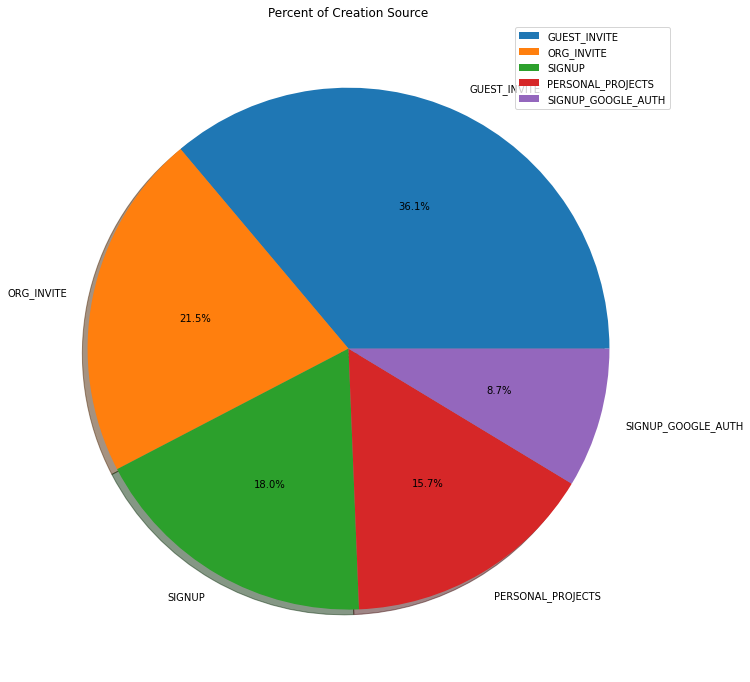

In [123]:
# visuallization of the retained customer distribuition distribuition
# Pie chart representation
pie_labels = ['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
 'SIGNUP_GOOGLE_AUTH']

#Number of benign and malignant cases
pie_y = merge_data['creation_source'].value_counts()

pie_explode = [0, 0, 0, 0, 0]

plt.figure(figsize=(12, 12))
plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 10})
plt.legend()
plt.title("Percent of Creation Source")
plt.show()


● creation_source: how their account was created. This takes on one of 5 values:

○ PERSONAL_PROJECTS: invited to join another user's personal workspace -ncode =2, 15.7%

○ GUEST_INVITE: invited to an organization as a guest (limited permissions)-ncode =0, 36.1%

○ ORG_INVITE: invited to an organization (as a full member)-ncode =1, 21.5%

○ SIGNUP: signed up via the website =3, 18%

○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)=4, 8.7%


In [124]:
# Trying to determine the host for e-mail host (comp)
merge_data['email_comp'] = merge_data.email.str.split('@').apply(lambda x: x[1])

In [125]:
print(len(merge_data['email_comp'].unique()))

812


There are 812 different e-mail so I need to see how many are common so it can be use for classification

In [126]:
# Analyzing the count values shows big differences on the most common host with others
merge_data['email_comp'].value_counts().head(20)

gmail.com         2930
yahoo.com         1726
jourrapide.com     883
gustr.com          842
cuvox.de           828
hotmail.com        803
luque.com            2
mumdc.com            2
xybhi.com            2
xvnbr.com            2
oqpze.com            2
cymqs.com            1
suwxx.com            1
wqnsa.com            1
tjorr.com            1
tlxhq.com            1
hgiyt.com            1
amknl.com            1
ispta.com            1
gxuif.com            1
Name: email_comp, dtype: int64

In [127]:
# according of the counts decided to classify as 'other' the emails host that had less or = 2 counts
main_ecomp = ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']
merge_data.email_comp = merge_data.email_comp.apply(lambda x: x if x in main_ecomp else 'other')

In [128]:
print(merge_data['email_comp'].unique())

['yahoo.com' 'gustr.com' 'jourrapide.com' 'cuvox.de' 'gmail.com' 'other'
 'hotmail.com']


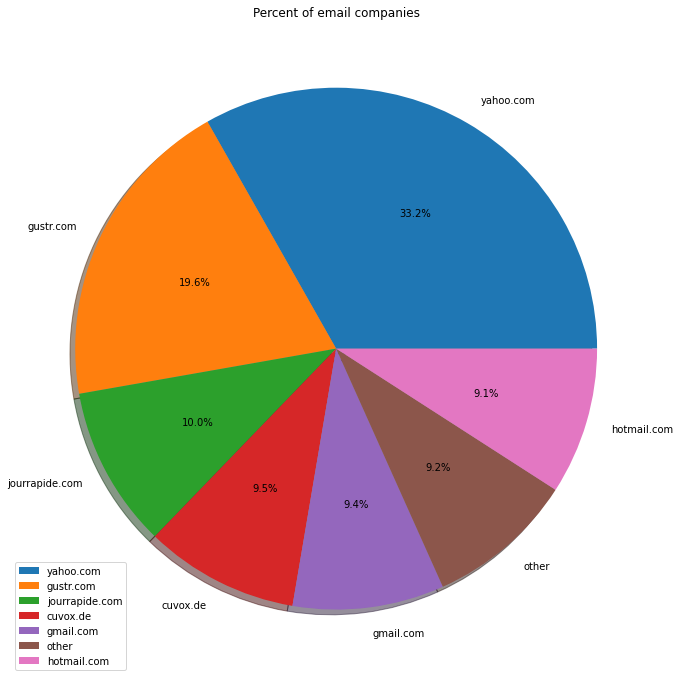

In [129]:
# visuallization of the retained customer distribuition distribuition
# Pie chart representation
pie_labels = ['yahoo.com', 'gustr.com', 'jourrapide.com', 'cuvox.de', 'gmail.com', 'other',
 'hotmail.com']

#Number of benign and malignant cases
pie_y = merge_data['email_comp'].value_counts()

pie_explode = [0,0,0,0,0,0,0]

plt.figure(figsize=(12, 12))
plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 10})
plt.legend()
plt.title("Percent of email companies")
plt.show()

In [130]:
# encoding the e-mail host
labelencoder = LabelEncoder()
merge_data['email_comp_n'] = labelencoder.fit_transform(merge_data['email_comp'])

In [131]:
print(merge_data['email_comp_n'].unique())

[6 2 4 0 1 5 3]


'yahoo.com'ncode=6, 

'gustr.com'ncode=2, 

'jourrapide.com'ncode=4, 

'cuvox.de'ncode=0, 

'gmail.com'ncode=1, 

'other'ncode=5,

'hotmail.com'ncode=3

In [132]:
print(merge_data['adopted'].unique())

[0 1]


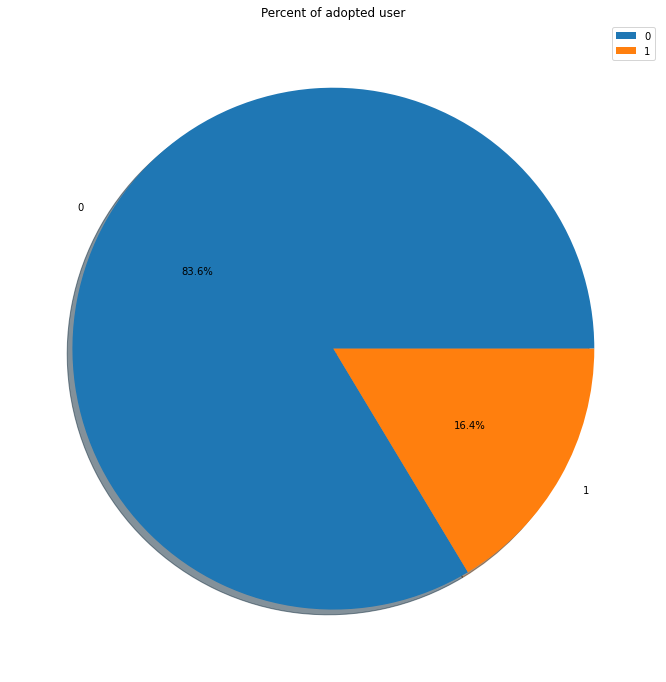

In [133]:
# visuallization of the retained customer distribuition distribuition
# Pie chart representation
pie_labels = [0,1]

#Number of benign and malignant cases
pie_y = merge_data['adopted'].value_counts()

pie_explode = [0,0]

plt.figure(figsize=(12, 12))
plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 10})
plt.legend()
plt.title("Percent of adopted user")
plt.show()

In [134]:
merge_data.head()

,user_id,visited,adopted,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_n,email_comp,email_comp_n
0,1,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0,yahoo.com,6
1,2,3,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1,gustr.com,2
2,3,1,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,1,gustr.com,2
3,4,1,0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0,yahoo.com,6
4,5,1,0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0,yahoo.com,6


In [135]:
merge_data['creation_time'] = pd.to_datetime(merge_data['creation_time'], format='%Y-%m-%d %H:%M:%S')
merge_data['last_session_creation_time'] = pd.to_datetime(merge_data['last_session_creation_time'], unit='s')

In [136]:
latest_creation = max(merge_data['creation_time'])
latest_creation

Timestamp('2014-05-30 23:59:19')

In [137]:
earliest_creation = min(merge_data['creation_time'])
earliest_creation

Timestamp('2012-05-31 00:43:27')

In [138]:
latest_session = max(merge_data['last_session_creation_time'])
latest_session

Timestamp('1970-01-01 00:00:01.402066730')

In [139]:
earliest_session = min(merge_data['last_session_creation_time'])
earliest_session

Timestamp('1970-01-01 00:00:01.338452406')

In [140]:
# creating the difference between the last session of creation time and the creation time
merge_data['time_diff'] = merge_data['creation_time'] - merge_data['last_session_creation_time']
merge_data.head()

,user_id,visited,adopted,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_n,email_comp,email_comp_n,time_diff
0,1,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0,yahoo.com,6,16182 days 03:53:28.601861190
1,2,3,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1,gustr.com,2,16024 days 03:45:02.603762496
2,3,1,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,1,gustr.com,2,15783 days 23:14:50.636265108
3,4,1,0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0,yahoo.com,6,15846 days 08:09:26.630789832
4,5,1,0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0,yahoo.com,6,15722 days 10:14:18.641150340


In [141]:
merge_data['time_diff'] = merge_data['time_diff'].dt.days
merge_data.head()

,user_id,visited,adopted,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_n,email_comp,email_comp_n,time_diff
0,1,1,0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0,yahoo.com,6,16182
1,2,3,1,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1,gustr.com,2,16024
2,3,1,0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,1,gustr.com,2,15783
3,4,1,0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0,yahoo.com,6,15846
4,5,1,0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0,yahoo.com,6,15722


In [142]:
# droping the categorical columns , leaving the ncode
merge_data.drop(['creation_time','last_session_creation_time','invited_by_user_id','email', 'name','creation_source','email_comp'],axis=1)

,user_id,visited,adopted,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_source_n,email_comp_n,time_diff
0,1,1,0,1,0,11,0,6,16182
1,2,3,1,0,0,1,1,2,16024
2,3,1,0,0,0,94,1,2,15783
3,4,1,0,0,0,1,0,6,15846
4,5,1,0,0,0,193,0,6,15722
...,...,...,...,...,...,...,...,...,...
8818,11996,1,0,0,0,89,1,2,15954
8819,11997,1,0,0,0,200,4,1,15715
8820,11998,1,0,1,1,83,0,0,16187
8821,11999,1,0,0,0,6,2,5,15491


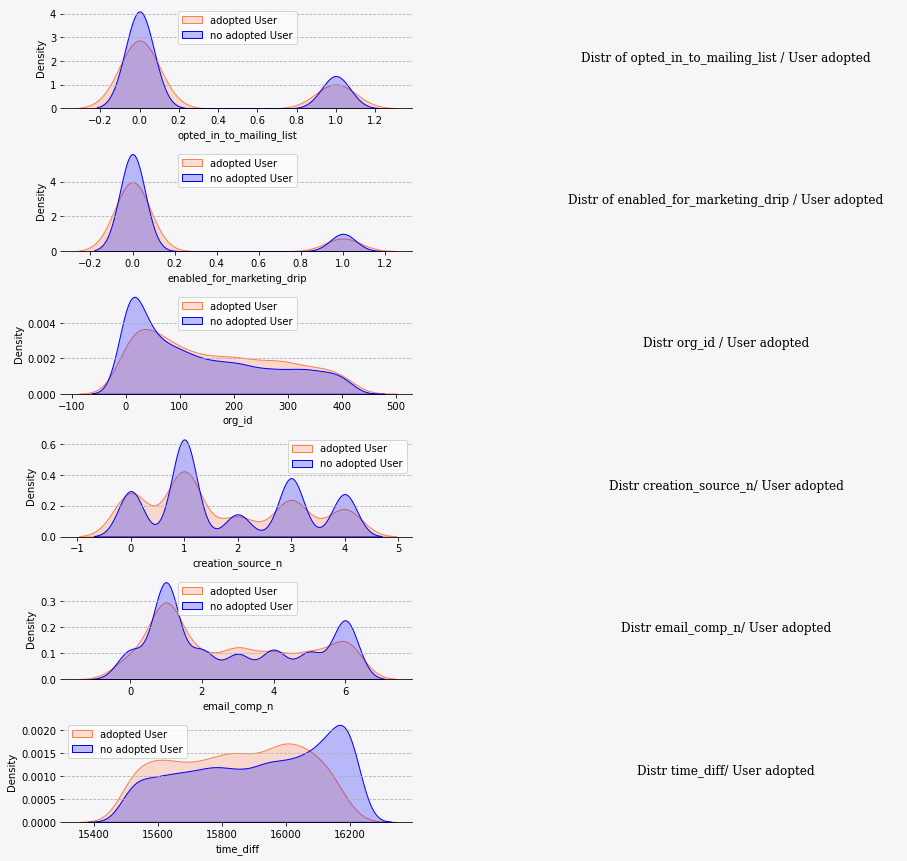

In [143]:
import seaborn as sns
fig = plt.figure(figsize=(50,15))
gs = fig.add_gridspec(6,6)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])


axes=[ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]

background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/
sns.kdeplot(ax=ax0,x=merge_data.loc[merge_data['adopted']==1]['opted_in_to_mailing_list'],color='coral',label='adopted User',shade=True)
sns.kdeplot(ax=ax0,x=merge_data.loc[merge_data['adopted']==0]['opted_in_to_mailing_list'],color='blue',label='no adopted User', shade=True)
ax0.legend(loc = 'upper center')
ax0.grid(linestyle='--', axis='y')

ax1.text(0.5,0.5,'Distr of opted_in_to_mailing_list / User adopted',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 12, fontfamily='serif')

sns.kdeplot(ax=ax2,x=merge_data.loc[merge_data['adopted']==1]['enabled_for_marketing_drip'],color='coral',label='adopted User',shade=True)
sns.kdeplot(ax=ax2,x=merge_data.loc[merge_data['adopted']==0]['enabled_for_marketing_drip'],color='blue',label='no adopted User',shade=True)
ax2.legend(loc = 'upper center')
ax2.grid(linestyle='--', axis='y')

ax3.text(0.5,0.5,'Distr of enabled_for_marketing_drip / User adopted',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 12, fontfamily='serif')


sns.kdeplot(ax=ax4,x=merge_data.loc[merge_data['adopted']==1]['org_id'],color='coral',label='adopted User',shade=True)
sns.kdeplot(ax=ax4,x=merge_data.loc[merge_data['adopted']==0]['org_id'],color='blue',label='no adopted User',shade=True)
ax4.legend(loc = 'upper center')
ax4.grid(linestyle='--', axis='y')
ax5.text(0.5,0.5,'Distr org_id / User adopted',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 12, fontfamily='serif')

sns.kdeplot(ax=ax6,x=merge_data.loc[merge_data['adopted']==1]['creation_source_n'],color='coral',label='adopted User',shade=True)
sns.kdeplot(ax=ax6,x=merge_data.loc[merge_data['adopted']==0]['creation_source_n'],color='blue',label='no adopted User',shade=True)
ax6.legend(loc = 'upper right')
ax6.grid(linestyle='--', axis='y')
ax7.text(0.5,0.5,'Distr creation_source_n/ User adopted',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 12, fontfamily='serif')

sns.kdeplot(ax=ax8,x=merge_data.loc[merge_data['adopted']==1]['email_comp_n'],color='coral',label='adopted User',shade=True)
sns.kdeplot(ax=ax8,x=merge_data.loc[merge_data['adopted']==0]['email_comp_n'],color='blue',label='no adopted User',shade=True)
ax8.legend(loc = 'upper center')
ax8.grid(linestyle='--', axis='y')
ax9.text(0.5,0.5,'Distr email_comp_n/ User adopted',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 12, fontfamily='serif')

sns.kdeplot(ax=ax10,x=merge_data.loc[merge_data['adopted']==1]['time_diff'],color='coral',label='adopted User',shade=True)
sns.kdeplot(ax=ax10,x=merge_data.loc[merge_data['adopted']==0]['time_diff'],color='blue',label='no adopted User',shade=True)
ax10.legend(loc = 'upper left')
ax10.grid(linestyle='--', axis='y')
ax11.text(0.5,0.5,'Distr time_diff/ User adopted',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 12, fontfamily='serif')

# removing labels

axes1=[ax1,ax3,ax5,ax7,ax9,ax11]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

<AxesSubplot:xlabel='creation_source', ylabel='count'>

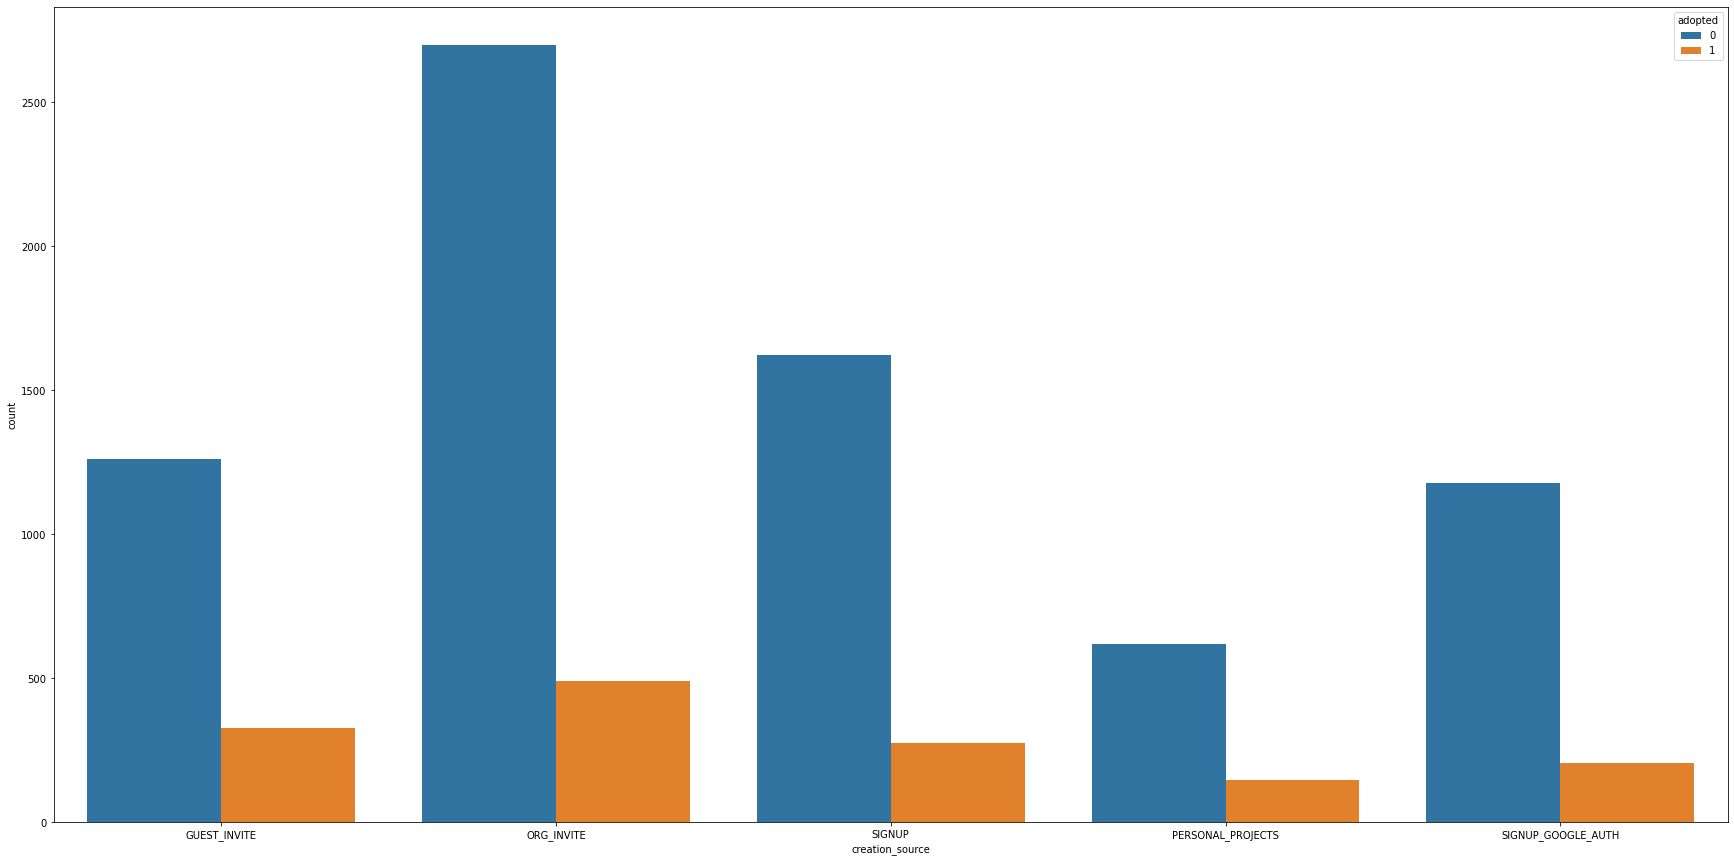

In [144]:
fig = plt.figure(figsize=(30,15))
sns.countplot(x = 'creation_source', hue = 'adopted', data =merge_data)

<AxesSubplot:xlabel='email_comp', ylabel='count'>

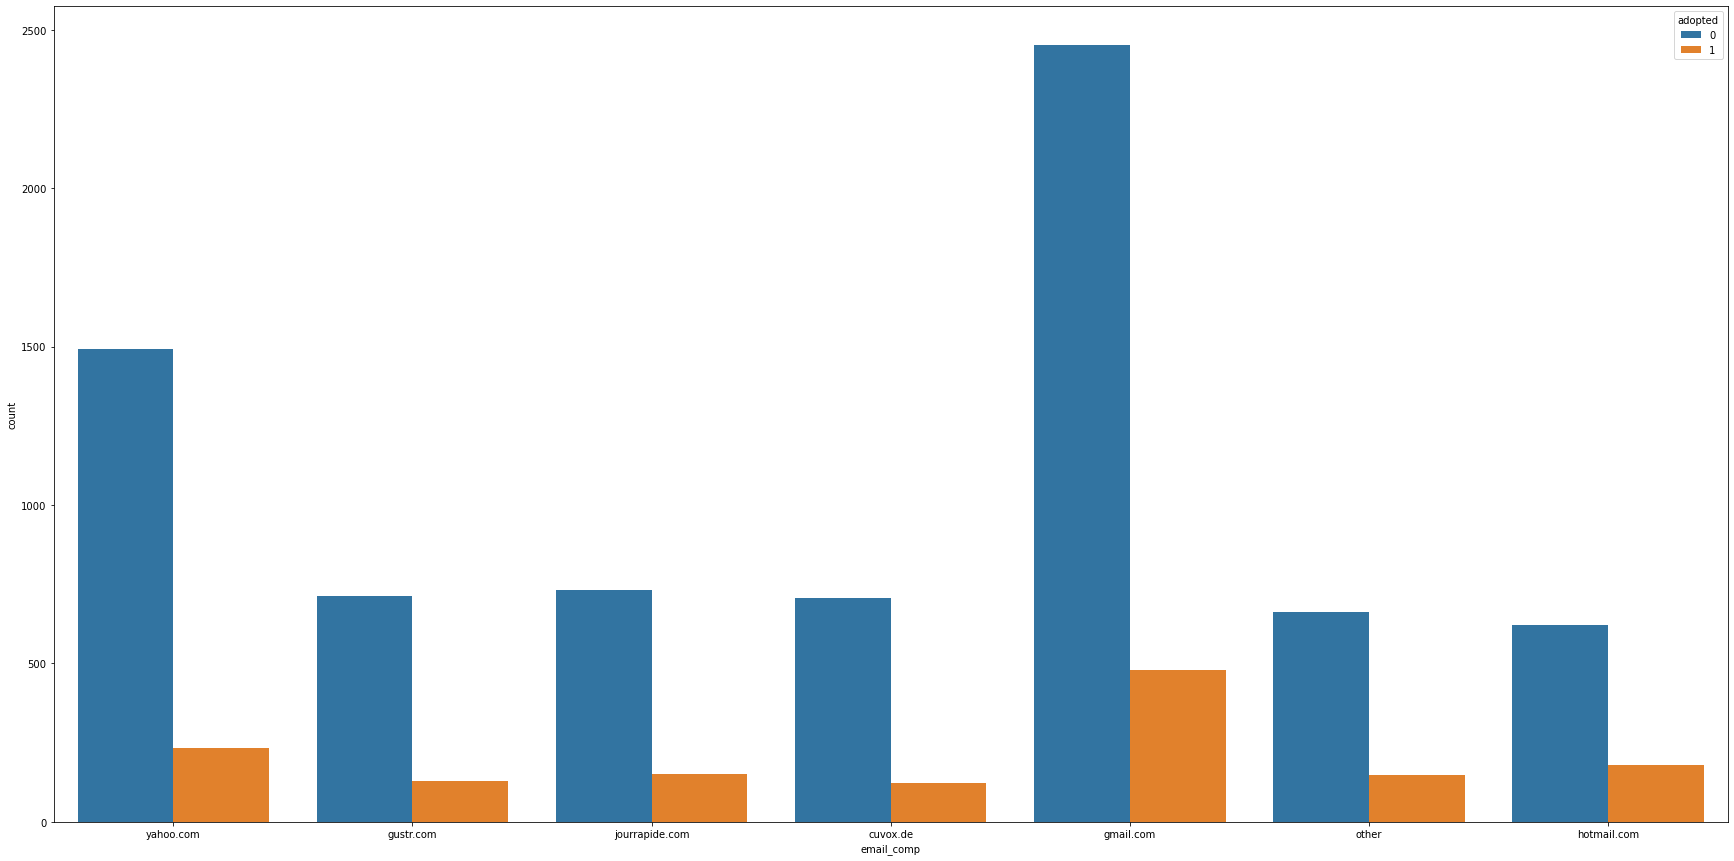

In [145]:
fig = plt.figure(figsize=(30,15))
sns.countplot(x = 'email_comp', hue = 'adopted', data =merge_data)

<AxesSubplot:xlabel='opted_in_to_mailing_list', ylabel='count'>

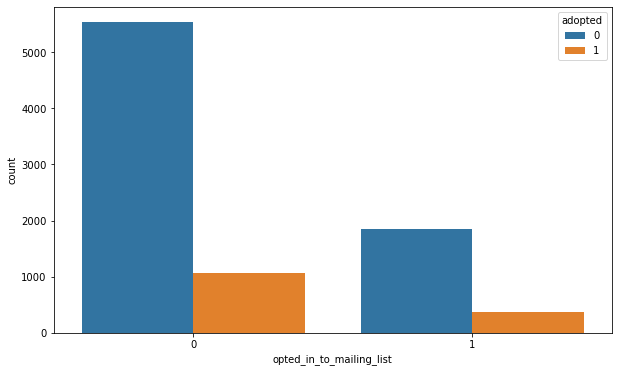

In [146]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x = 'opted_in_to_mailing_list', hue = 'adopted', data =merge_data)

<AxesSubplot:xlabel='enabled_for_marketing_drip', ylabel='count'>

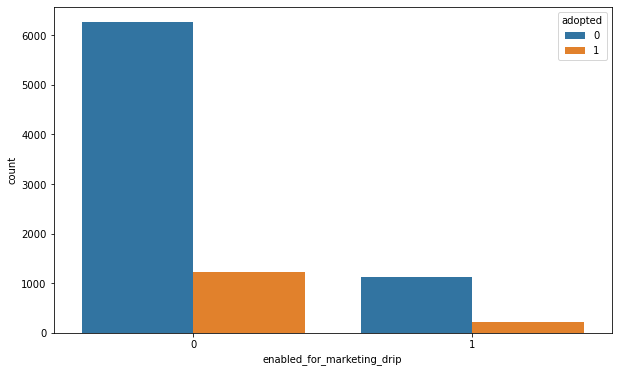

In [147]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x = 'enabled_for_marketing_drip', hue = 'adopted', data =merge_data)

In [166]:
new_df=merge_data.drop(['creation_time','last_session_creation_time','invited_by_user_id','visited','email', 'name','creation_source','email_comp', 'user_id'],axis=1).copy()

__Null Hypothesis__

In [167]:
import scipy.stats as stats
for col in ['adopted', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'org_id', 'creation_source_n', 'email_comp_n', 'time_diff']:

    print(col + ": ", stats.ttest_ind(new_df[col][(new_df['adopted']==1)],new_df[col][(new_df['adopted']==0)], equal_var=True))

adopted:  Ttest_indResult(statistic=inf, pvalue=0.0)
opted_in_to_mailing_list:  Ttest_indResult(statistic=0.8897041681274812, pvalue=0.37364901825884456)
enabled_for_marketing_drip:  Ttest_indResult(statistic=0.35059159689942204, pvalue=0.7259031332744816)
org_id:  Ttest_indResult(statistic=6.596382844715307, pvalue=4.455409727461713e-11)
creation_source_n:  Ttest_indResult(statistic=-3.7347972902121898, pvalue=0.00018905011350870476)
email_comp_n:  Ttest_indResult(statistic=-0.8008084771425681, pvalue=0.4232640987608819)
time_diff:  Ttest_indResult(statistic=-11.568964709976912, pvalue=9.85844287889769e-31)


__Results__

According to the pvalues the following features aren't statistically significant:

opted_in_to_mailing_list

enabled_for_marketing_drip

email_comp_n

__Heat Map__

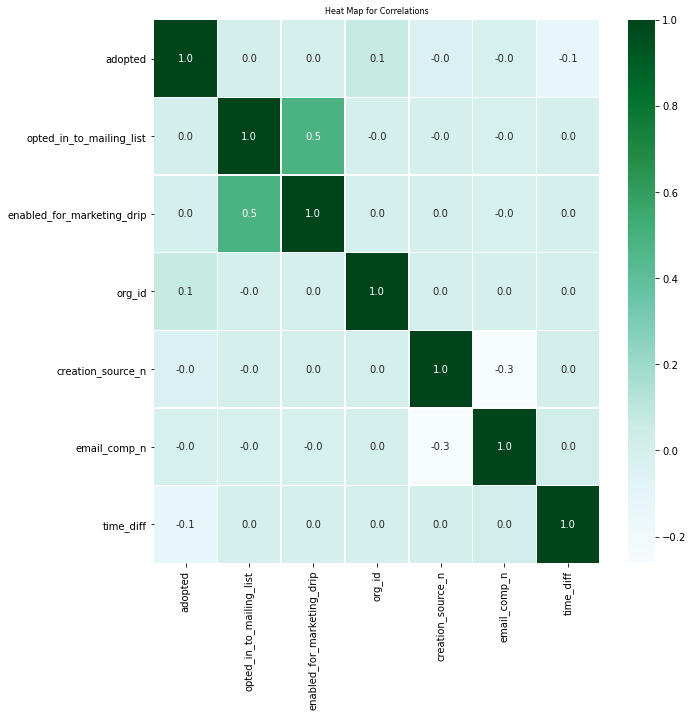

In [168]:
plt.rcParams['figure.figsize'] = (10, 10)

# sns.heatmap(df.corr(), cmap = 'pink', annot = True, linewidths = 0.5, fmt = '.1f')
sns.heatmap(new_df.corr(), cmap = 'BuGn', annot = True, linewidths = 0.5, fmt = '.1f')
plt.title('Heat Map for Correlations', fontsize = 8)
plt.show()

__Correlation with the Target__

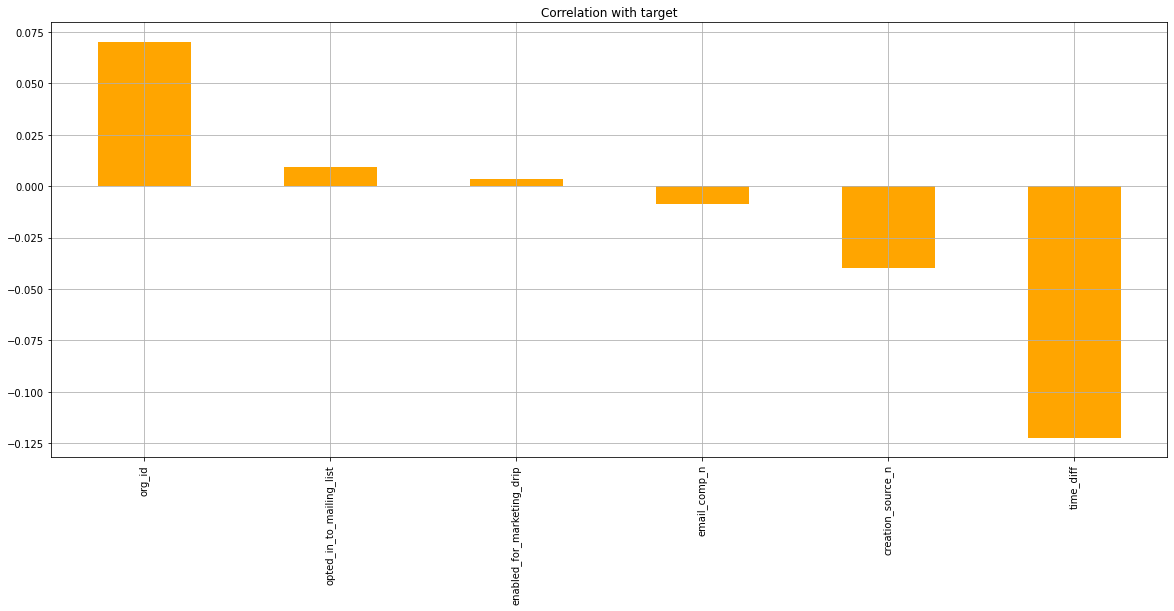

In [169]:
correl=new_df.drop('adopted', axis=1).corrwith(new_df.adopted)
df_c = correl.sort_values(ascending=False)
df_c.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target",color="Orange");

In [170]:
print(new_df.columns)

Index(['adopted', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'org_id', 'creation_source_n', 'email_comp_n', 'time_diff'],
      dtype='object')


In [171]:
# dropping the features that aren't statistically significant
new_df=new_df.drop(['opted_in_to_mailing_list', 'enabled_for_marketing_drip','email_comp_n'], axis=1)

In [155]:
df_all_scaled = new_df.copy()

column = ['adopted', 'org_id', 'creation_source_n', 'time_diff']
features_all = df_all_scaled[column]
features_all.head()

,adopted,org_id,creation_source_n,time_diff
0,0,11,0,16182
1,1,1,1,16024
2,0,94,1,15783
3,0,1,0,15846
4,0,193,0,15722


__Scaling__

In [172]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_all_scaled[column] = scaler.fit_transform(features_all.values)
df_all_rscaled=df_all_scaled[column]

In [173]:
df_all_rscaled.head()

,adopted,org_id,creation_source_n,time_diff
0,0.0,-0.468900,-0.5,0.679947
1,1.0,-0.516746,0.0,0.260292
2,0.0,-0.071770,0.0,-0.379814
3,0.0,-0.516746,-0.5,-0.212483
4,0.0,0.401914,-0.5,-0.541833


In [174]:
# defining the dependent and independent variables

Xtrain = new_df[['org_id', 'creation_source_n', 'time_diff']]
ytrain = new_df[['adopted']]

In [175]:
# building the model and fitting the data
import statsmodels.api as sm
Xtrain=sm.add_constant(Xtrain)
log_reg_no_scale = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.435260
         Iterations 6


In [160]:
# printing the summary table
print(log_reg_no_scale.summary())

                           Logit Regression Results                           
Dep. Variable:                adopted   No. Observations:                 8823
Model:                          Logit   Df Residuals:                     8819
Method:                           MLE   Df Model:                            3
Date:                Thu, 10 Feb 2022   Pseudo R-squ.:                 0.02382
Time:                        14:05:17   Log-Likelihood:                -3840.3
converged:                       True   LL-Null:                       -3934.0
Covariance Type:            nonrobust   LLR p-value:                 2.234e-40
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.4226      2.122     10.565      0.000      18.263      26.582
org_id                0.0015      0.000      6.644      0.000       0.001       0.002
creation_source_n    -0.

__Feature Importance__

In [176]:
X_all = df_all_rscaled[[ 'org_id', 'creation_source_n', 'time_diff']]
y_all = df_all_rscaled[['adopted']]
X_all=sm.add_constant(X_all)

In [177]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.3, random_state = 42, stratify=y_all)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (6176, 4)
Number transactions y_train dataset:  (6176, 1)
Number transactions X_test dataset:  (2647, 4)
Number transactions y_test dataset:  (2647, 1)


# Preprocessing the Data

Because the data is imbalance smote was used

In [178]:
# print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_smo, y_train_smo = sm.fit_resample(X_train, y_train)
  

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train_smo.shape)
print("Number transactions y_train dataset: ", y_train_smo.shape)


Number transactions X_train dataset:  (10330, 4)
Number transactions y_train dataset:  (10330, 1)


In [179]:
# Before balancing
y_train['adopted'].value_counts()

0.0    5165
1.0    1011
Name: adopted, dtype: int64

In [180]:
# after Balancing the training data with SMOTE
y_train_smo['adopted'].value_counts()

1.0    5165
0.0    5165
Name: adopted, dtype: int64

__Random Forest Feature Importances__

In [181]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf.fit(X_train_smo, y_train_smo.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel()

RandomForestRegressor()

In [182]:
# To get the feature importances from the Random Forest model use the feature_importances_ attribute:
rf.feature_importances_

array([0.        , 0.43392463, 0.08505805, 0.48101732])

In [185]:
feature_names = ['org_id', 'creation_source_n', 'time_diff']
   
# List2
rf_feature_importances_ = [ 0.43392463, 0.08505805, 0.48101732]
   
# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(feature_names, rf_feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names', 'rf_feature_importances_'])
df_fim.sort_values(by=['rf_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim)

       feature_names  rf_feature_importances_
2          time_diff                 0.481017
0             org_id                 0.433925
1  creation_source_n                 0.085058


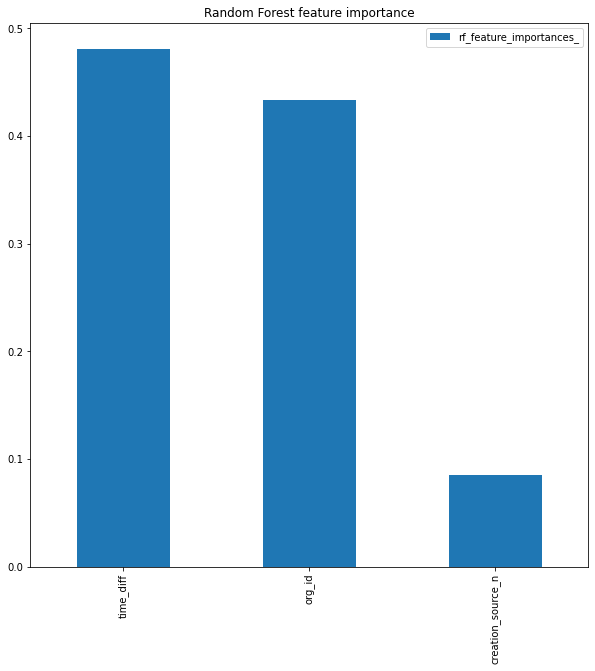

In [186]:
ax = df_fim[['feature_names','rf_feature_importances_']].sort_values(by='rf_feature_importances_',ascending=False).plot(kind='bar')
ax.set_title('Random Forest feature importance')
ax.set_xticklabels(df_fim.feature_names);

# Modeling

__Tunning Parameterers__

Tunning parameters for Random Forest model

In [204]:
rfm = RandomForestClassifier()
#Tuning parameters and performing cross-validation
# Setup the hyperparameter grid
#number of trees in Forest
n_estimators = [10, 50, 100, 250, 500]
max_depth = [1, 2, 5, 10, 20, None]
param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}
# Instantiate the GridSearchCV object: rf_cv
rf_cv = GridSearchCV(rfm, param_grid, cv=5, scoring='roc_auc')

#Fitting the model
rf_cv.fit(X_train_smo, y_train_smo.values.ravel())

print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_)) 
print("Best score is all features{}".format(rf_cv.best_score_))

Tuned Random Forest Parameters: {'max_depth': None, 'n_estimators': 500}
Best score is all features0.8468005948894609


In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
#Random forest with best parameters
rfm = RandomForestClassifier(max_depth=None, n_estimators=500, random_state = 42)
#Fitting the model
rfm.fit(X_train_smo, y_train_smo.values.ravel())

y_pred = rfm.predict(X_test)
y_prob = rfm.predict_proba(X_test)
# Scoring with AUC
print('ROC AUC score Features:', roc_auc_score(y_test,  rfm.predict_proba(X_test)[:,1]))
# calculate brier score
brier_loss = brier_score_loss(y_test, rfm.predict_proba(X_test)[:, 1])
print("Brier score features {}".format(brier_loss))
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

ROC AUC score Features: 0.5960734745044469
Brier score features 0.21831007862056648
Confusion Matrix:
[[1640  573]
 [ 273  161]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.86      0.74      0.79      2213
         1.0       0.22      0.37      0.28       434

    accuracy                           0.68      2647
   macro avg       0.54      0.56      0.54      2647
weighted avg       0.75      0.68      0.71      2647



Tunning parameters for logistic Regression

In [212]:
# Setup the hyperparameter grid
c_space = [0.0001, 0.001, .01, .1, .5, 1, 10]
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')

# Fit it to the data
logreg_cv.fit(X_train_smo,y_train_smo.values.ravel())
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best AUC-ROC score is {}".format(logreg_cv.best_score_))

# calculate brier score
brier_loss = brier_score_loss(y_test, logreg_cv.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

#Storing false and true positive rates to plot ROC later
lr_fpr, lr_tpr, _ = roc_curve(y_test, logreg_cv.predict_proba(X_test)[:, 1])




Tuned Logistic Regression Parameters: {'C': 0.5}
Best AUC-ROC score is 0.6090859337880907
Brier score is 0.24133794371716158


In [213]:
lr = LogisticRegression(C = 0.5, random_state = 42).fit(X_train_smo, y_train_smo.values.ravel())
print('Best ROC AUC:', roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

y_predlr = lr.predict(X_test)
y_problr = lr.predict_proba(X_test)
# calculate brier score
brier_loss = brier_score_loss(y_test, lr.predict_proba(X_test)[:, 1])
print("Brier score is {}".format(brier_loss))

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_predlr))

print("Classification Report")
print(metrics.classification_report(y_test, y_predlr))

Best ROC AUC: 0.6182611755837416
Brier score is 0.24133794371716158
Confusion Matrix:
[[1279  934]
 [ 177  257]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.58      0.70      2213
         1.0       0.22      0.59      0.32       434

    accuracy                           0.58      2647
   macro avg       0.55      0.59      0.51      2647
weighted avg       0.77      0.58      0.63      2647



__Model Evaluation__

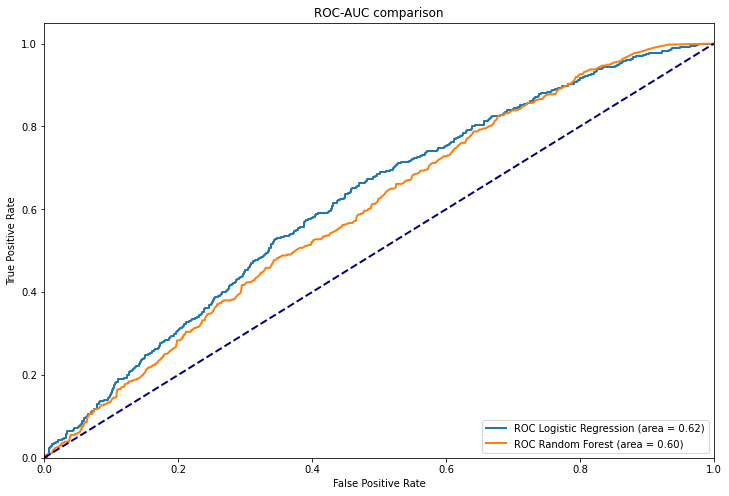

In [214]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12,8))

for fpr, tpr, model in [(lr_fpr,lr_tpr,'Logistic Regression'),(rf_fpr,rf_tpr,'Random Forest')]:
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,
             lw=2, label='ROC '+ model + ' (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC comparison')
plt.legend(loc="lower right")
plt.show()

<Figure size 720x720 with 0 Axes>

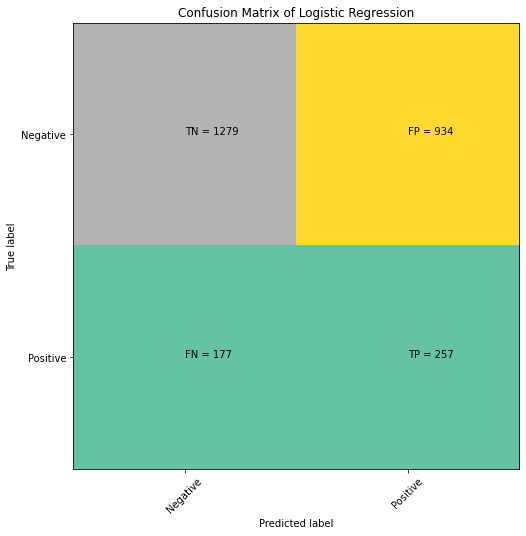

In [224]:
from sklearn.metrics import confusion_matrix, fbeta_score
cm = confusion_matrix(y_test, lr.predict(X_test))
plt.clf()
plt.figure(figsize=(8,12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Set2)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Conclusion

After defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period the data showed to be imbalanced, so it required to be up sample for our training and further modeling.
Many of the features were categorical, so for the analysis these features required encoding.
Several features were eliminated before modeling because they were statistically insignificant according to the t-test.
The length of time between the account creation and the last Login showed to be the main factor for the prediction, followed by organization id and the creation source.
Two algorithms were tested : Random Forest and logistic Regression.
The AUC_score for the two models were close but Logistic Regression was higher .
The performance on the test set was not as satisfactory as I was hoping for .
The classification report showed a precision for the no adopted of 88 percent  and 22 percent for the adopted while the recall  showed 58 percent for no adopted and 59 for adopted,
I would suggest to do more testing with other algorithms.
